# Homework Assignment 5: Approximating $\pi$

In the summer of 2021, researchers at the Swiss university Fachhochschule Graubünden broke the world record of the most calculated digits of $\pi$, the mathematical constant that describes the ratio of a circle's circumference to its diameter. Usually, when we talk about pi, we talk about the number $3.14$ (or $3.1415$ if you're fancy), but because its decimals never end, nor do they settle into a pattern, pi's digits go on forever. The researchers reached a whopping 62.8 trillion digits using a supercomputer. In comparison, in 1874, William Shanks calculated the number of pi to 707 decimal places, which took him 15 years to do so! 

There are many ways to calculate the digits of $\pi$ - you can use random sampling, geometry, calculus, number theory, etc. But why do we care? If you give me the first 39 digits of $\pi$, I can tell you the width of the 
known universe within one hydrogen atom. Do we really need 62.8 trillion? 

Well, no, probably not. But that doesn't mean this isn't valuable. To generate these approximations, we use many important tools from mathematics, computer science, and computer engineering. You need to deal with questions about the accuracy of floating point arithmetic, questions of estimations and error bounds, and questions concerning optimization. All of these are valuable, even if the other 62,799,999,999,961 digits aren't. 

As a reference, here are the first 100 decimals of $\pi$:

    3.1415926535 8979323846 2643383279 5028841971 6939937510 
      5820974944 5923078164 0628620899 8628034825 3421170679

Next we generate a large number of random (uniformly distributed) points within the square and count how many fall inside the enclosed circle. The probability of landing inside the circle is the ratio of the area of the circle over the total area of the square. Since the area of the circle is $A = \pi r^2 = \pi$ and the total area of the square is $A = 2^2 = 4$, the odds are $\pi/4$.

By the law of large numbers, the average number of random points that land inside the circle will converge to the true probability $\pi / 4$. Thus multiplying such a randomly sampled probability estimate by 4 yields an approximation of pi. 

## Problem 1: Monte Carlo (2 points)

Implement the function `monte_carlo_pi` below. You can use the [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function to generate random points in the plane. For example, to generate a single point in the plane, you could use

    x, y = np.random.uniform(-1, 1, 2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def monte_carlo_pi(N):
    """
    Generate N uniformly distributed points in the square [-1,1) x [-1,1) and keeps
    track of which of these points fall inside/outisde the circle of radius 1 centered 
    at the origin (0,0), and keeps track of the approximation 
    pi ≈ 4 * number_inside / total 
    as the number of randomly sampled points increases. 
    
    Parameters
    ----------
        N (int): number of randomly sampled points in [-1, 1) x [-1, 1)
        
    Returns
    -------
        points_inside (list): A list whose first entry is a list of x-values of
            the points in [-1, 1) x [-1, 1) that fall inside the circle, 
            and whose second entry is a list of y-values of the points that
            fall inside the circle. (See test case below)
        
        points_outisde(list): A list whose first entry is a list of x-values of
            the points in [-1, 1] x [-1, 1] that fall outside the circle, 
            and whose second entry is a list of y-values of the points that
            fall outside the circle. (See test case below)
        
        current_pi (list): A list whose i-th entry is the approximation of pi using
            only the first i randomly sampled points. 
    
    """
    
    number_inside = 0
    points_inside = [[], []]
    points_outside = [[], []]
    current_pi = []
    
    # Sample individual points using x, y = np.random.uniform(-1,1,2)
    # one at a time.
    
    # YOUR CODE HERE
    for i in range(1,N+1):
        x, y = np.random.uniform(-1,1,2)
        if (x**2+y**2)**0.5>1:
            points_outside[0].append(x)
            points_outside[1].append(y)
        else:
            points_inside[0].append(x)
            points_inside[1].append(y)
            number_inside+=1
        current_pi.append(4 * number_inside / i)
      
    return(points_inside, points_outside, current_pi)

In [3]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code.


In the code cell below, we create an image similar to the inscribed circle in the square from earlier, but now including the randomly sampled points. Those points that fall inside the circle are colored green and those that fall outside are colored red. 

Next to it we plot the approximations of pi as the number of sampled points increases, which should converge towards the actual value of pi, highlighted with a dotted red line. Due to the randomness in generating the points, running the cell several times will generate a different outcomes. 

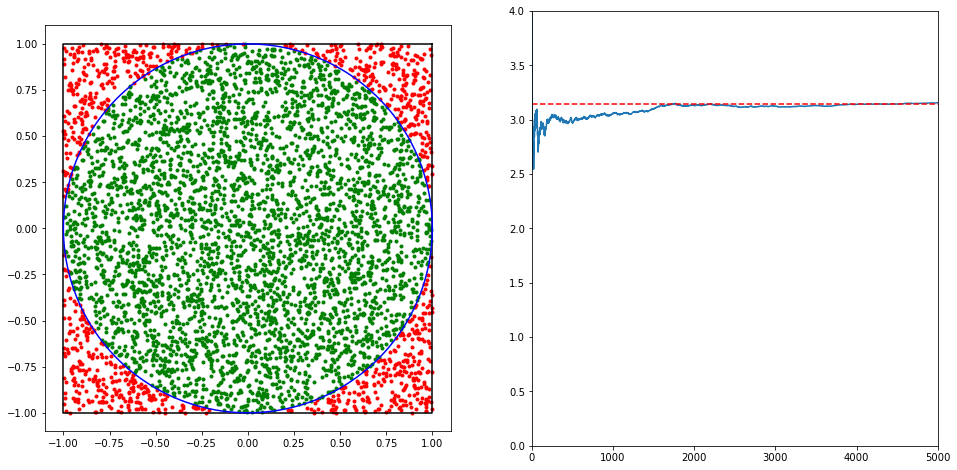

Final pi:  3.156


In [4]:
# To see the entire image, go to Cell --> All Outputs --> Toggle Scrolling
N = 5000
# Generate a bunch of x and y values between -1 and 1
points_inside, points_outside, current_pi = monte_carlo_pi(N)

# Draw a square and a circle to frame out the simulation
squareX = [1,-1,-1,1,1]
squareY = [1,1,-1,-1,1]

circleX,circleY = [],[]

for i in range(361):
    circleX.append(np.cos(np.pi*i/180))
    circleY.append(np.sin(np.pi*i/180))


plt.rcParams['figure.figsize'] = [16, 8]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(squareX, squareY, color='black')
ax1.plot(circleX, circleY, color='b')
ax1.scatter(*points_inside, c='g', marker='.')
ax1.scatter(*points_outside, c='r', marker='.')
ax1.set_aspect('equal')

ax2.plot(range(N), current_pi)
ax2.axhline(y=np.pi, c='r', ls='--')
ax2.axis([0, N, 0, 4])
plt.show()

print("Final pi: ", current_pi[-1])

In [5]:
# Test case

# set random seed, to fix the randomly generated points
np.random.seed(1)
points_inside, points_outside, current_pi = monte_carlo_pi(5)
print("Points inside: \n", points_inside)
print("Points outside: \n", points_outside)
print("Approximations pi: \n", current_pi)

Points inside: 
 [[-0.165955990594852, -0.6274795772446582, -0.20646505153866013], [0.4406489868843162, -0.3088785459139045, 0.07763346800671389]]
Points outside: 
 [[-0.9997712503653102, -0.7064882183657739], [-0.39533485473632046, -0.8153228104624044]]
Approximations pi: 
 [4.0, 2.0, 1.3333333333333333, 2.0, 2.4]


Expected output:   
   
    Points inside: 
     [[-0.165955990594852, -0.6274795772446582, -0.20646505153866013], 
      [0.4406489868843162, -0.3088785459139045, 0.07763346800671389]]
    Points outside: 
     [[-0.9997712503653102, -0.7064882183657739], 
      [-0.39533485473632046, -0.8153228104624044]]
    Approximations pi: 
     [4.0, 2.0, 1.3333333333333333, 2.0, 2.4]

In [6]:
# Autograding
np.random.seed(1)
points_inside, points_outside, current_pi = monte_carlo_pi(5)

assert np.allclose(points_inside, [[-0.165955990594852, -0.6274795772446582, -0.20646505153866013], [0.4406489868843162, -0.3088785459139045, 0.07763346800671389]])
assert np.allclose(points_outside, [[-0.9997712503653102, -0.7064882183657739], [-0.39533485473632046, -0.8153228104624044]])
assert np.allclose(current_pi, [4.0, 2.0, 1.3333333333333333, 2.0, 2.4])

## Problem 2: Riemann Sums (2 points)

Implement the function `Riemann_pi` below to approximate pi using the midpoint for the Riemann sums.

In [7]:
def Riemann_pi(N):
    """
    Computes an approximation of pi using Riemann sums to approximate
    the area of the first quadrant of the unit circle. Its rectangles 
    have width 1/N and their heights are the function value of sqrt(1-x^2) 
    evaluated at the midpoint of each rectangle. 
    
    Parameters
    ----------
        N (int): Number of rectangles
        
    Returns
    -------
        pi (float): Approximation of pi using the midpoint Riemann sum
    
    """
    
    # YOUR CODE HERE
    return(4*sum(np.sqrt(1-(np.arange(1,2*N+1,2)/(2*N))**2))/N)

In [8]:
# Test case
pi = Riemann_pi(10000)
print(pi)

3.1415929980246315


Expected output:

    3.1415929980246284
    
Because of finite precision your solution might deviate slightly. Note that using 10.000 rectangles, the approximation is correct for the first 6 decimals of pi. 

In [9]:
# Autograder
pi = Riemann_pi(100)
assert np.allclose(pi, 3.1419368579000078)

# Infinite Series Approach

The Riemann sums are certainly an improvement on our previous Monte Carlo method, but we can do better. The idea of using infinite sums seems to be working, so we'll continue down that path and move through some historical results.

## Problem 3: John Wallis (2 points)
English mathematician John Wallis came up with the following [formula](https://en.wikipedia.org/wiki/Wallis_product) for $\pi$ in 1655 as an infinite product:
$$\frac{\pi}{2} = \frac{2}{1} \cdot \frac{2}{3} \cdot \frac{4}{3} \cdot \frac{4}{5} \cdot \frac{6}{5} \cdot \frac{6}{7} \cdot \frac{8}{7} \cdot \frac{8}{9} \dots$$
The denominator and numerator are alternately incremented by 2. In code, every even iteration we can increment the denominator and every odd iteration we can increment the numerator.

Implement `Wallis_pi`'s infinite product below.

In [10]:
def Wallis_pi(N):
    """
    Approximates pi using the first N terms that appear in the Wallis product. 
    That is if N=3, then pi/2 ≈ 2/1 * 2/3 * 4/3, and so pi ≈ 2 * 2/1 * 2/3 * 4/3.
    
    Parameters
    ----------
        N (int): Number of terms used in the Wallis product
        
    Returns
    -------
        pi (float): Approximation for pi (NOT pi/2!)
        
    """
    
    # YOUR CODE HERE
    a=np.arange(1,N+1)%2+np.arange(1,N+1)
    b=np.r_[1,a[0:(len(a)-2)]+1,a[N-1]+1-2*(N%2)]
    pi=2*np.prod(a/b)
    
    return(pi)

In [11]:
# Test cases
print("Using 100 terms, pi is approximately", Wallis_pi(100))
print("Using 10001 terms, pi is approximately", Wallis_pi(10001))


Using 100 terms, pi is approximately 3.126078900215409
Using 10001 terms, pi is approximately 3.1417497057380084


Expected output:

    Using 100 terms, pi is approximately 3.126078900215409
    Using 10001 terms, pi is approximately 3.1417497057380084

In [12]:
# Autograding
assert np.allclose(Wallis_pi(100), 3.126078900215409)
assert np.allclose(Wallis_pi(101), 3.1570301764551654)

## Problem 4: Gregory-Leibniz (1 point)

Next we have the Gregory-Leibniz series. We know from trigonometry that $\tan(\pi/4) = 1$ and hence for the inverse tangent $\arctan(1) = \pi/4$. In next week's lectures we will see that we can represent $\arctan(x)$ as an infinite series (its Taylor series) around $x=0$:
$$\arctan(x) = x - \frac{x^3}{3} + \frac{x^5}{5} - \frac{x^7}{7} + \dots = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{2n+1}.$$
Plugging in $x=1$ and multiplying both sides by 4 yields
$$\pi = \frac{4}{1} - \frac{4}{3} + \frac{4}{5} - \frac{4}{7} + \frac{4}{9} - \frac{4}{11} + \frac{4}{13} - \dots$$
This is a very simple [formula](https://en.wikipedia.org/wiki/Leibniz_formula_for_%CF%80) and it gives us $\pi$ directly. All we need to do, is add 2 to the denominator each time and flip between subtraction and addition.

Implement the Gregory-Leibniz series below.

In [13]:
def arctan_pi(N):
    """
    Approximates pi using the first N terms in the Gregory-Leibniz series. 
    That is if N=3, then pi ≈ 4/1 - 4/3 + 4/5. 
    
    Parameters
    ----------
        N (int): Number of terms used in the Gregory-Leibniz formula.
        
    Returns
    -------
        pi (float): Approximation of pi. 
    
    """
    
    # YOUR CODE HERE
    a=4*(np.arange(1,N+1)%2*2-1)
    b=np.arange(1,2*N+1,2)
    pi=sum(a/b)
    return(pi)

In [14]:
# Test cases
print("Using 100 terms, pi is approximately", arctan_pi(100))
print("Using 10001 terms, pi is approximately", arctan_pi(10001))

Using 100 terms, pi is approximately 3.1315929035585537
Using 10001 terms, pi is approximately 3.1416926435905346


Expected output:

    Using 100 terms, pi is approximately 3.1315929035585537
    Using 10001 terms, pi is approximately 3.1416926435905346

In [15]:
# Autograding
assert np.allclose(arctan_pi(100), 3.1315929035585537)
assert np.allclose(arctan_pi(101), 3.1514934010709914)

## Problem 5: Nilakantha (1 point)

Another infinite sum, this one from the 15th century Indian mathematician Nilakantha Somayaji, is similar to the Gregory-Leibinz series.

\begin{align*}
\pi &= 3 + \frac{4}{2 \times 3 \times 4} - \frac{4}{4 \times 5 \times 6} + \frac{4}{6 \times 7 \times 8} - \frac{4}{8 \times 9 \times 10} + \dots \\
&= 3 + \sum_{n=1}^{\infty} (-1)^{n-1} \frac{4}{2n \cdot (2n+1) \cdot (2n+2)} \\
&\approx 3 + \sum_{n=1}^{N} (-1)^{n-1} \frac{4}{2n \cdot (2n+1) \cdot (2n+2)}.
\end{align*}

Implement the function `Nilakantha_pi` **recursively** to approximate $\pi$. 

In [16]:
def Nilakantha_pi(N):
    """
    Approximate pi using the first N terms (see formula above).
    That is if N = 3, pi ≈ 3 + 4/(2*3*4) - 4/(4*5*6) + 4/(6*7*8).
    
    -!-!- IMPORTANT: Use `Nilakantha_pi(N-1)` in your code,
    -!-!- exactly like this (otherwise the autograder won't recognize your
    -!-!- solution as a recursive solution)
    
    Parameters
    ----------
        N (int): Number of terms used in the Nilakantha formula
        
    Returns
        pi (float): approximation of pi. 
        
    """
    if N>1:
        return((-1)**(N-1)*4/(2*N*(2*N+1)*(2*N+2))+Nilakantha_pi(N-1))
    elif N==1:
        return(3+(-1)**(N-1)*4/(2*N*(2*N+1)*(2*N+2))+Nilakantha_pi(N-1))
    else:
        return(0)

In [17]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code.


In [18]:
# Test cases
print("Using 100 terms, pi is approximately", Nilakantha_pi(100))

Using 100 terms, pi is approximately 3.1415924109719824


Expected output:

    Using 100 terms, pi is approximately 3.1415924109719824

In [19]:
# Autograding
assert np.allclose(Nilakantha_pi(100), 3.1415924109719824)
assert np.allclose(Nilakantha_pi(10), 3.1414067184965018)

import inspect
sig = inspect.signature(Nilakantha_pi)
source = inspect.getsource(Nilakantha_pi)

assert "Nilakantha_pi(N-1)" in source, "Is your function recursive?"

## Problem 6: Francois Viete (1 point)

The following formula was discovered by the French mathematician [Francois Viete](https://en.wikipedia.org/wiki/Vi%C3%A8te%27s_formula) in 1593:
$$\frac{2}{\pi} = \frac{\sqrt{2}}{2} \cdot \frac{\sqrt{2 + \sqrt{2}}}{2} \cdot \frac{\sqrt{2 + \sqrt{2 + \sqrt{2}}}}{2} \dots$$
These are just the first three terms of an infinite series and already grow to somewhat monstrous proportions. However, if you look closely, you can see that each numerator is just the square root of 2 plus the previous numerator. This even applies to the first term if you assume the previous numerator is 0.

Implement `Viete_pi`'s infinite product to approximate $\pi$. 

In [20]:
def Viete_pi(N):
    """
    Approximate pi using the first N terms appearing in Viete's formula. 
    That is if N=3, approximate 2/pi ≈ √2/2*√(2+√2)/2*√(2+√(2+√2))/2.
    
    Parameters
    ----------
        N (int): Number of terms used in Viete's formula.
        
    Returns
    -------
        pi (float): Approximation of pi. 
    """
    # YOUR CODE HERE
    b=[np.sqrt(2)]
    for i in range(1,N):
        b.append(np.sqrt(2+b[i-1]))

    pi=(2**(N+1))/(np.prod(b))
    return(pi)

In [21]:
# Test cases
print("Using 100 terms, pi is approximately", Viete_pi(100))

Using 100 terms, pi is approximately 3.141592653589794


Expected output:

    Using 100 terms, pi is approximately 3.141592653589794

In [22]:
# Autograding
assert np.allclose(Viete_pi(100), 3.141592653589794)
assert np.allclose(Viete_pi(10), 3.1415914215111997)

## Problen 7: Continued fractions (1 point)

Lastly we will expess $\pi$ as an infinite fraction, a so called generalized continued fraction:
$$\pi = \frac{4}{1 + \frac{1^2}{3 + \frac{2^2}{5 + \frac{3^2}{7 + \frac{4^2}{9 + \dots}}}}}.$$

The single term approximation will be given by
$$\pi \approx \frac{4}{1},$$
the two term approximation will be given by
$$\pi \approx \frac{4}{1 + \frac{1^2}{3}},$$
the three term approximation will be given by
$$\pi \approx \frac{4}{1 + \frac{1^2}{3 + \frac{2^2}{5}}}.$$

Implement the function `CF_pi` below, optionally **recursively**. 

In [23]:
def CF_pi(k, N):
    """
    Approximate pi using its continued fraction expression recursively
    up to its Nth term, for N>2. 
    CF_pi(1,N) returns the continued fraction approximation of pi using N terms. 
    
    Parameters
    ----------
        k (int): Parameter that can be used for recursion
        N (int): Number of terms in the approximation
        
    Returns
    -------
        pi (float): Approximation of pi.
    
    """
    
    # YOUR CODE HERE
    p=2*N-1
    N-=1
    while N>0:
        p=N*2-1+(N**2)/p
        N-=1
    
    return(4/p)

In [24]:
# You can use this code cell to play around with your code to make sure
# it does what it is intended to do, i.e. to debug your code.


In [25]:
# Test case
print("Using 5 terms, pi is approximately", CF_pi(1, 5))

Using 5 terms, pi is approximately 3.142342342342342


Expected output:

    Using 5 terms, pi is approximately 3.142342342342342

In [26]:
# Autograder
assert np.allclose(CF_pi(1,10), 3.14159254044654)